In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import pickle

In [2]:
PROJ_ROOT = '/Users/mloui/Documents/STAR/SOFAR'

In [13]:
# Upload normal data
data = pd.read_csv(f'{PROJ_ROOT}/data/simulated/sim_train1.csv')
all_data = data.to_numpy()
# Remove fault columns
use_data = all_data[:,:-3]
print(use_data.shape)
print(use_data[10])

(540000, 13)
[ 4.27489169  1.61377738  3.28712251  7.9413146   0.25554456  0.63067393
  7.96395936  0.26761411  0.20830884 -0.51720671  0.15783271  0.18073429
 10.        ]


### Train

In [14]:
# Train model
# Seed for deterministic
gmm = GaussianMixture(n_components=3, n_init=5)
y_gmm = gmm.fit_predict(use_data)

In [15]:
# y_mmm are the labels
print(y_gmm)

[1 1 1 ... 2 2 2]


In [16]:
# Save model
with open(f'{PROJ_ROOT}/models/gmm_sim1.pkl','wb') as f:
    pickle.dump(gmm, f)

### Visualize

(3,)
(3, 13)
(3, 13, 13)


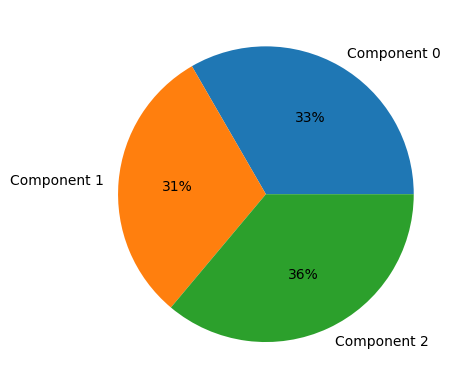

In [64]:
# Look at learned mixture
weights = gmm.weights_
means = gmm.means_
cov = gmm.covariances_

print(weights.shape)
print(means.shape)
print(cov.shape)

labels = [f'Component {i}' for i in range(len(weights))]
plt.pie(weights, labels = labels, autopct='%.0f%%')
plt.show()

In [ ]:
# Visualize
i = 0

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

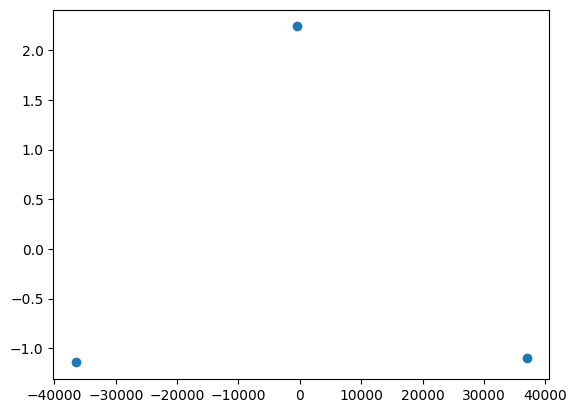

In [69]:
# Not the most useful
pca = PCA(2)
comp_2d = pca.fit_transform(means)

plt.scatter(comp_2d[:,0], comp_2d[:,1])
plt.show()

### Evaluate

In [44]:
# Load test data
gt_f_data = pd.read_csv(f'{PROJ_ROOT}/data/simulated/IRF_Z_data2.csv')
gt_data = gt_f_data.to_numpy()[:1000,:13]
print(gt_data.shape)
gt_faults = np.array(gt_f_data['Fault']).astype(int)[:1000]
print(gt_faults.shape)

(1000, 13)
(1000,)


/var/folders/6z/g64l984s7ydfnk6dkdvrz3zw0000gp/T/ipykernel_27444/762754390.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_f_data = pd.read_csv(f'{PROJ_ROOT}/data/simulated/IRF_Z_data2.csv')


In [45]:
# Evaluate: Get log-prob of each sample (more negative = less likely)
scores = gmm.score_samples(gt_data)
print(scores.shape)

(1000,)


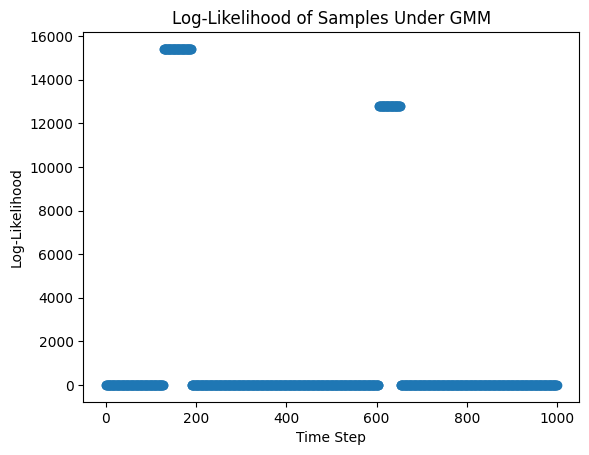

In [70]:
plt.scatter(range(len(scores)), scores)
plt.title('Log-Likelihood of Samples Under GMM')
plt.ylabel('Log-Likelihood')
plt.xlabel('Time Step')
plt.show()

AUC: 1.0


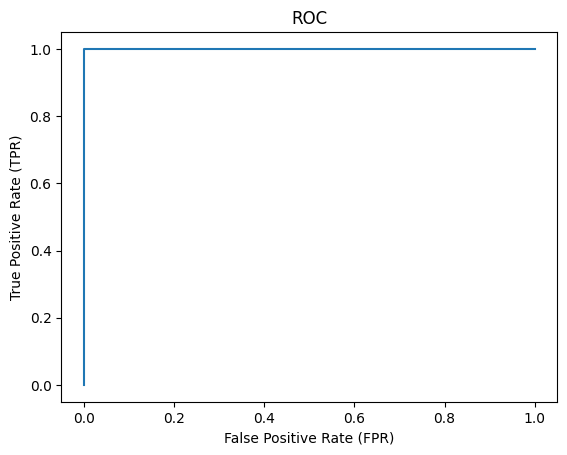

In [52]:
# Calculate AUC
scores = np.absolute(scores)
fpr, tpr, thres = roc_curve(gt_faults, scores)
auc = roc_auc_score(gt_faults, scores)
print(f'AUC: {auc}')

# Plot
plt.plot(fpr, tpr)
plt.title(f'ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()